In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import math
import random as randn
import datetime
from pandas import Series, DataFrame
from bokeh.plotting import figure
from bokeh.io import output_file, show
%matplotlib inline
import nltk
import scipy.sparse as sparse
from datetime import datetime
import csv

In [5]:
hot = pd.read_csv('/Users/Priya/Downloads/datafiniti-hotel-reviews/7282_1.csv')
hot.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [6]:
hot.rename(columns = {'reviews.date':'reviews_date', "reviews.dateAdded":"reviews_dateAdded","reviews.doRecommend":"reviews_doRecommend","reviews.id":"reviews_id","reviews.rating":"reviews_rating", "reviews.text":"reviews_text","reviews.title":"reviews_title","reviews.userCity":"reviews_userCity","reviews.username":"reviews_username","reviews.userProvince":"reviews_userProvince"}, inplace = True)
hot.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [7]:
hot.reviews_text=hot.reviews_text.astype(str)

In [8]:
hot[['reviews_rating','reviews_text']].head()

,reviews_rating,reviews_text
0,4.0,Pleasant 10 min walk along the sea front to th...
1,5.0,Really lovely hotel. Stayed on the very top fl...
2,5.0,Ett mycket bra hotell. Det som drog ner betyge...
3,5.0,We stayed here for four nights in October. The...
4,5.0,We stayed here for four nights in October. The...


In [9]:
# Finding the missing values in ratings and text

hot.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews_date              259
reviews_dateAdded           0
reviews_doRecommend     35912
reviews_id              35912
reviews_rating            862
reviews_text                0
reviews_title            1621
reviews_userCity        19649
reviews_username           43
reviews_userProvince    18394
dtype: int64

In [10]:
hot1 = hot.copy()
hot1

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
5,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We loved staying on the island of Lido! You ne...,Very nice hotel,NaN,A Traveler,NaN
6,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-06-10T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Lovely view out onto the lagoon. Excellent vie...,Lovely view out onto the lagoon. Excellent view.,NaN,A Traveler,NaN
7,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,ottimo soggiorno e ottima sistemazione nei gio...,Lovely view out onto the lagoon. Excellent view.,NaN,A Traveler,NaN
8,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-09-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...,G��nstige Lage,NaN,Doppeldecker,NaN
9,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-16T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Lidoen er perfekt til et par dages ro og afsla...,Ro og hygge,NaN,A Traveler,NaN


In [11]:
hot1['reviews_rating'].fillna('0').head()

0    4
1    5
2    5
3    5
4    5
Name: reviews_rating, dtype: object

In [12]:
# Setting values 0 and 1 for ratings (0 being ratings less than 5 and 1 being ratings equal to or greater than 5)

hot1["reviews_rating"] = hot1["reviews_rating"].apply(lambda x: '1' if x >= 5 else '0')

In [13]:
hot1.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [24]:
nltk.download


<bound method Downloader.download of <nltk.downloader.Downloader object at 0x113213cc0>>

In [25]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, words
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /Users/Priya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
from six.moves import range
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

In [27]:
#let's drop rows with missing quotes
hot1['reviews_text'].dropna().head()

0    Pleasant 10 min walk along the sea front to th...
1    Really lovely hotel. Stayed on the very top fl...
2    Ett mycket bra hotell. Det som drog ner betyge...
3    We stayed here for four nights in October. The...
4    We stayed here for four nights in October. The...
Name: reviews_text, dtype: object

In [28]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [29]:
if type(hot['reviews_text']) is str:
        hot1['reviews_text'] = hot1['reviews_text'].lower()

In [30]:
if type(hot1['reviews_text']) is str:
    print (reviews_text)

In [100]:
def preprocess (eachline):
    sentence = eachline.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    stop_words = (w for w in tokens if not w in stop)
    clean_words =(w for w in stop_words if not w.isnumeric())
    stemmed = [w for w in clean_words if lemmatizer.lemmatize(w)] 
    return ' '.join(stemmed)

In [101]:
cleaned_reviews = []
for w in hot1['reviews_text']:
    cleaned_reviews.append(preprocess(w))

In [102]:
from matplotlib import pylab

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
Xtfidf=tfidfvectorizer.fit_transform(cleaned_reviews)

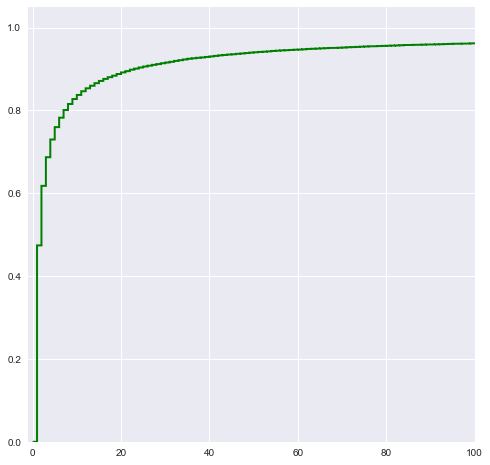

In [104]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
df = list((Xtfidf > 0).sum(0).tolist()[0])
c = pd.Series(df)
y = np.arange(c.sum())
plt.hist(c,y,normed=1, histtype='step', color='g', cumulative=True, linewidth=2)
plt.xlim(-1,100)
plt.xlabel= "document count (xi)"
plt.ylabel= "% of words that appear less than xi times"
plt.show()

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer1 = TfidfVectorizer(min_df=5)
X_clean=tfidfvectorizer1.fit_transform(cleaned_reviews)
y_clean = (hot1.reviews_rating)

In [106]:
idf = tfidfvectorizer1.idf_
idf_score =(dict(zip(tfidfvectorizer1.get_feature_names(), idf)))

In [107]:
a = pd.DataFrame.from_dict(idf_score, orient='index')

In [108]:
a.columns = ['Score']

In [109]:

a.sort_values('Score', ascending=False).head(10)

,Score
comforable,9.697095
overnatning,9.697095
parecen,9.697095
faint,9.697095
pajamas,9.697095
fairgrounds,9.697095
painfully,9.697095
baskets,9.697095
pads,9.697095
fame,9.697095


In [110]:
from sklearn.cross_validation import StratifiedKFold

In [111]:
kf = StratifiedKFold(y_clean,n_folds=5, shuffle=True)
for train, test in kf:
    X1cl_train, X1cl_test = X_clean[train], X_clean[test]
    y1cl_train, y1cl_test = y_clean[train], y_clean[test]

In [112]:

X1cl_train.shape, X1cl_test.shape, y1cl_train.shape, y1cl_test.shape

((28731, 8549), (7181, 8549), (28731,), (7181,))

In [113]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [139]:
clf1=MultinomialNB(alpha=0.01)
clf1.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(clf1.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(clf1.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of MultinomialDB with alpha = 0.01:')
print(classification_report(clf1.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.74543935385
Accuracy of training data:  0.795934704674


Classification report summary of MultinomialDB with alpha = 0.01:
             precision    recall  f1-score   support

          0       0.83      0.79      0.81      4810
          1       0.60      0.66      0.63      2371

avg / total       0.75      0.75      0.75      7181



In [115]:
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [116]:
y_true_MNB = np.array(y1cl_test).astype(int)
y_pred_MNB = np.array(clf1.predict(X1cl_test)).astype(int)
MultinomialNB_auc = roc_auc_score(y_true_MNB, y_pred_MNB)
MultinomialNB_auc

0.71826289713165914

In [117]:
probas1_ = clf1.predict_proba(X1cl_test)[:,1]
probas1_

array([ 0.42193519,  0.93716192,  0.33483719, ...,  0.95967539,
        0.91219412,  0.97388186])

In [118]:
fpr1,tpr1,_ = roc_curve(y_true_MNB, probas1_)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV

In [73]:
Cs = [0.001, 0.1, 1, 10, 100]
parameters = {'C':Cs}
log = LogisticRegression()
clf2 = grid_search.GridSearchCV(log, parameters)

In [74]:
samplex = X1cl_train[:15000]
sampley = y1cl_train[:15000]

In [75]:
clf2.fit(samplex,sampley)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [76]:
clf2.best_params_

{'C': 1}

In [77]:
logit=LogisticRegression(C=10)
logit.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(logit.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(logit.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Logistic Regression C=1:')
print(classification_report(logit.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.742375713689
Accuracy of training data:  0.846820507466


Classification report summary of Logistic Regression C=1:
             precision    recall  f1-score   support

          0       0.82      0.79      0.80      4752
          1       0.61      0.66      0.63      2429

avg / total       0.75      0.74      0.74      7181



In [78]:
y_true_auc = np.array(y1cl_test).astype(int)

In [79]:
y_pred_auc = np.array(logit.predict(X1cl_test)).astype(int)

In [80]:
Logistic_auc = roc_auc_score(y_true_auc, y_pred_auc)
Logistic_auc

0.71411079922956122

In [81]:
probas2_ = logit.predict_proba(X1cl_test)[:,1]

In [82]:
fpr2,tpr2,_ = roc_curve(y_true_auc, probas2_)

In [83]:
dtree=DecisionTreeClassifier(max_depth=100, criterion='entropy')
dtree.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(dtree.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(dtree.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Decision Tree:')
print(classification_report(dtree.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.67845703941
Accuracy of training data:  0.945459608089


Classification report summary of Decision Tree:
             precision    recall  f1-score   support

          0       0.78      0.73      0.75      4833
          1       0.51      0.56      0.53      2348

avg / total       0.69      0.68      0.68      7181



In [84]:
y_true_auc3 = np.array(y1cl_test).astype(int)
y_pred_auc3 = np.array(dtree.predict(X1cl_test)).astype(int)
DecisionTree_auc = roc_auc_score(y_true_auc3, y_pred_auc3)
DecisionTree_auc

0.64163615894661963

In [85]:
probas3_ = dtree.predict_proba(X1cl_test)[:,1]

In [86]:
fpr3,tpr3,_ = roc_curve(y_true_auc3, probas3_)

In [142]:
random=RandomForestClassifier(n_estimators=100)
random.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(random.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(random.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of RandomForest:')
print(classification_report(random.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.742654226431
Accuracy of training data:  0.981727054401


Classification report summary of RandomForest:
             precision    recall  f1-score   support

          0       0.87      0.76      0.81      5220
          1       0.52      0.69      0.60      1961

avg / total       0.77      0.74      0.75      7181



In [141]:
y_true_auc4 = np.array(y1cl_test).astype(int)
y_pred_auc4 = np.array(random.predict(X1cl_test)).astype(int)
RandomForest_auc=roc_auc_score(y_true_auc4, y_pred_auc4)
RandomForest_auc

0.69648701226796228

In [90]:
proba4_ = random.predict_proba(X1cl_test)[:,1]


In [91]:
fpr4,tpr4,_ = roc_curve(y_true_auc4, proba4_)

In [96]:
from matplotlib import pylab

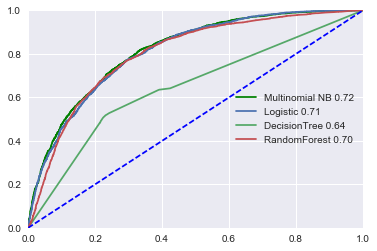

In [138]:
plt.plot(fpr1,tpr1, label=('Multinomial NB %.2f' %MultinomialNB_auc), color='g')
plt.plot(fpr2,tpr2, label=('Logistic %.2f' %Logistic_auc))
plt.plot(fpr3,tpr3, label=('DecisionTree %.2f' %DecisionTree_auc))
plt.plot(fpr4,tpr4, label=('RandomForest %.2f' %RandomForest_auc))
plt.legend(loc='right')
plt.plot([0,1],[0,1],'b--')
plt.xlim(0,1)
plt.ylim(0,1)
y_label= ('True Positive Rate')
x_label = ('False Positive Rate')
plt.show()